In [1]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Custom post processing functions
import TEVA_Post_Processing as post

In [2]:
# Import CC and DNF output files
ccs = pd.read_excel('ccs_2DOC_CAMELS.xlsx', sheet_name='CCEA_Low')
dnfs = pd.read_excel('dnfs_2DOC_CAMELS.xlsx', sheet_name='DNFEA_Low')

# Import observation data
data = pd.read_csv('test_observations.csv')

In [3]:
# List of the CCs composing each DNF
all_ccs = post.parse_dnf(dnfs)
all_ccs_flat = post.flatten(all_ccs)

# List of the features composing each CC
cc_features = post.parse_cc(ccs)

# List of the unique CCs across all DNFs
# unique_ccs = (np.unique(all_ccs_flat))

# Fitness contours
# x_fit, y_fit, z_fit, fitness = post.fitness_contours(1000, dnfs, ccs)

# CC and DNF lengths (needed later for plotting)
# cc_len = np.arange(1, max(ccs['order']) + 1, 1)
# dnf_len = np.arange(1, max(dnfs['order']) + 1, 1)

In [4]:
unique_features = pd.unique(post.flatten(cc_features))

In [5]:
'''
This function goes through the CC features and builds a "correlation" - style matrix
that shows how many times each feature appears in a CC with each other feature.
    Inputs: list of unique features
            cc_features

    Output: 2d matrix
'''

matrix = np.zeros((len(unique_features), len(unique_features)))

# select the first feature
for i in range(0, len(unique_features)):
    # select the second feature
    for j in range(0, len(unique_features)):
        # pass if same feature is selected
        if unique_features[i] == unique_features[j]:
            pass
        else:
            # loop through cc_features
            for k in range(0, len(cc_features)):
                # pass for all order 1 CCs
                if len(cc_features[k]) == 1:
                    pass
                else:
                    # check if first feature is in the cc
                    if unique_features[i] in cc_features[k]:
                        # check if second feature is in the cc
                        if unique_features[j] in cc_features[k]:
                            matrix[i,j] += 1


In [6]:
def CC_usage_heatmap(unique_features, cc_features):
    '''
    This function goes through the CC features and builds a "correlation" - style matrix
    that shows how many times each feature appears in a CC with each other feature.
        Inputs: list of unique features
                cc_features

        Output: 2d matrix
    '''

    matrix = np.zeros((len(unique_features), len(unique_features)))

    # select the first feature
    for i in range(0, len(unique_features)):
        # select the second feature
        for j in range(0, len(unique_features)):
            # pass if same feature is selected
            if unique_features[i] == unique_features[j]:
                pass
            else:
                # loop through cc_features
                for k in range(0, len(cc_features)):
                    # pass for all order 1 CCs
                    if len(cc_features[k]) == 1:
                        pass
                    else:
                        # check if first feature is in the cc
                        if unique_features[i] in cc_features[k]:
                            # check if second feature is in the cc
                            if unique_features[j] in cc_features[k]:
                                matrix[i,j] += 1
    
    matrix[np.triu_indices_from(matrix, k=0)] = np.nan
    
    return matrix

In [7]:
cc_matrix = CC_usage_heatmap(unique_features, cc_features)

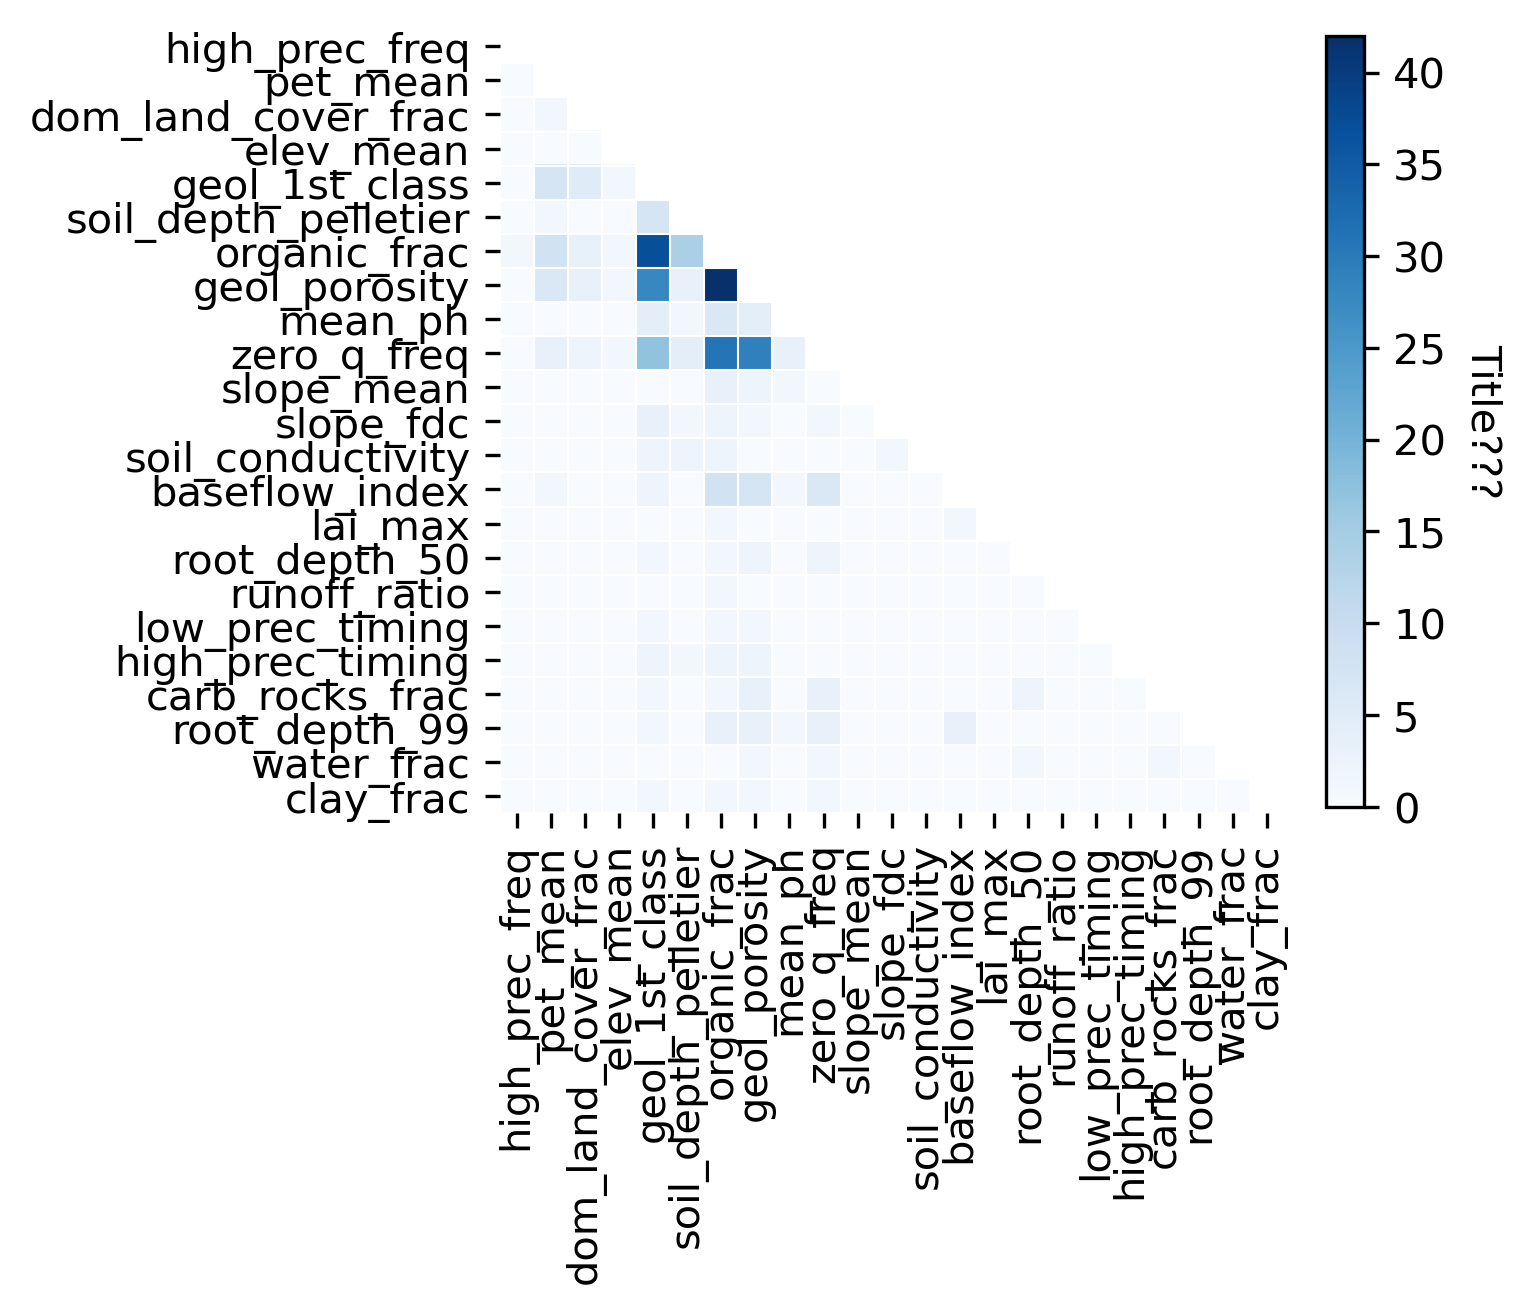

In [8]:
#### Figure
fig, ax = plt.subplots(figsize=(5,5), dpi=300, layout='constrained')

#### Plot
im = plt.imshow(cc_matrix,
                cmap='Blues')

#### Colorbar
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.65)
cbar.ax.set_ylabel('Title???', rotation=-90, va='bottom')

#### Axes
# turn off spines
ax.spines[:].set_visible(False)
# label ticks
ax.set_xticks(range(unique_features.shape[0]), labels=unique_features, rotation=90)
ax.set_yticks(range(unique_features.shape[0]), labels=unique_features)
# set up white grid
ax.set_xticks(np.arange(unique_features.shape[0]+1)-.5, minor=True)
ax.set_yticks(np.arange(unique_features.shape[0]+1)-.5, minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=0.5)
ax.tick_params(which='minor', bottom=False, left=False)
plt.gca().set_aspect('equal', adjustable='box')


In [9]:
p = figure(width=400, height=400)

# must give a vector of images
p.image(image=[cc_matrix], x=0, y=0, dw=len(unique_features), dh=len(unique_features))

show(p)